## `Problem Statement:`

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

###### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

###### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,plot_roc_curve

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import make_column_transformer

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [4]:
data=df
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_ID::	        Unique Loan ID

Gender::	        Male/ Female

Married::	        Applicant married (Y/N)

Dependents::	    Number of dependents

Education:: 	    Applicant Education (Graduate/ Under Graduate)

Self_Employed::	    Self employed (Y/N)

ApplicantIncome::	Applicant income

CoapplicantIncome	Coapplicant income

LoanAmount:     	Loan amount in thousands

Loan_Amount_Term:: 	Term of loan in months

Credit_History::	credit history meets guidelines

Property_Area:: 	Urban/ Semi Urban/ Rural

Loan_Status::   	Loan approved (Y/N)


In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Showing all columns null values.

In [7]:
data.shape

(614, 13)

data has 614 no. of records and 13 columns including target vaiable.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


All columns with their data types and no. of records are explained. we have to fill null values in it. 

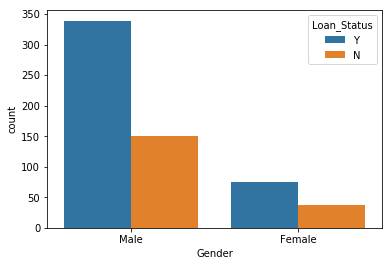

In [9]:
sns.countplot(data['Gender'],hue=data['Loan_Status'])

In [10]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Male Class people has high chance of getting loan

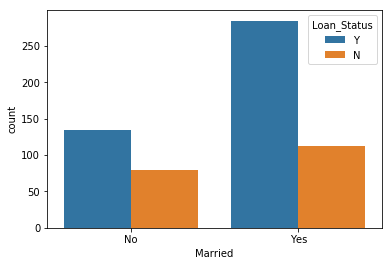

In [11]:
sns.countplot(data['Married'],hue=data['Loan_Status'])

Married people has hign chances of getting loan.

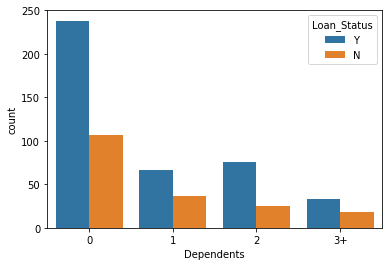

In [12]:
sns.countplot(data['Dependents'],hue=data['Loan_Status'])

Less the person dependents higher chance of getting loan.

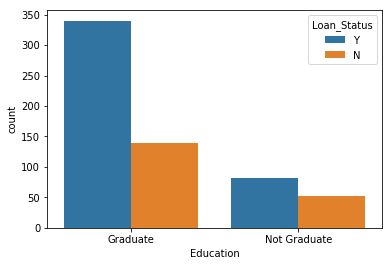

In [13]:
sns.countplot(data['Education'],hue=data['Loan_Status'])

Graduate people has high chances of getting loan.

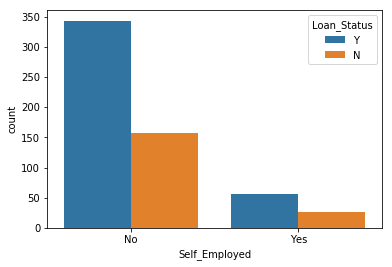

In [14]:
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])

No selfEmployed people has high chances of getting approval for loan.

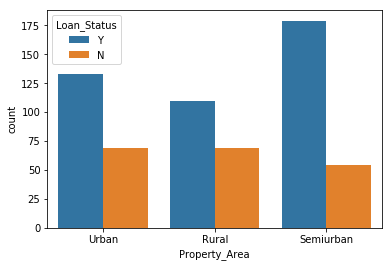

In [15]:
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])

More applicants from Semi-urban and also likely to be granted loans.

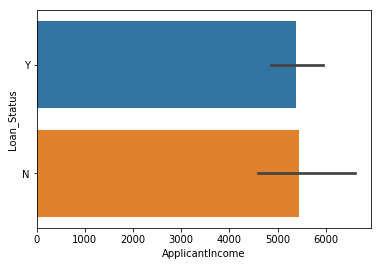

In [16]:
sns.barplot(data['ApplicantIncome'],data['Loan_Status'])

Applicant income has equally distributed to both classes of loan_Status.

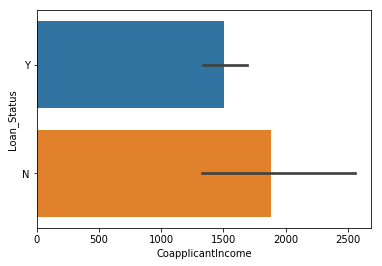

In [17]:
sns.barplot(data['CoapplicantIncome'],data['Loan_Status'])

CoapplicantIncome >1500 has very less chance for approval of loanStatus.

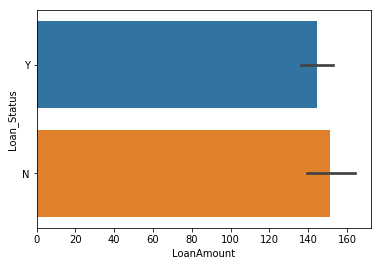

In [18]:
sns.barplot(data['LoanAmount'],data['Loan_Status'])

loan amount has equally distributed to both classes of loan_Status.

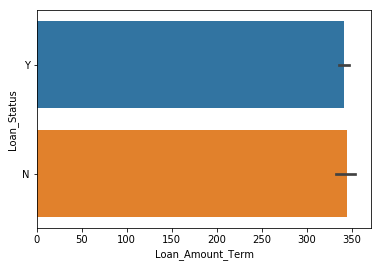

In [19]:
sns.barplot(data['Loan_Amount_Term'],data['Loan_Status'])

loan amount terms has equally distributed to both classes of loan_Status.

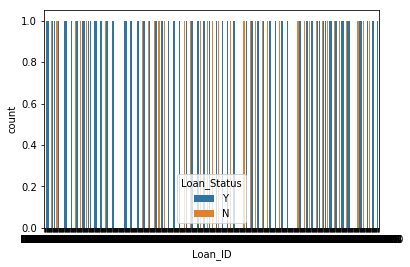

In [20]:
sns.countplot(data['Loan_ID'],hue=data['Loan_Status'])

As LoanId has uniques values of a particular loan. So from here we getting no info whther which particular loan id person got loan or not.

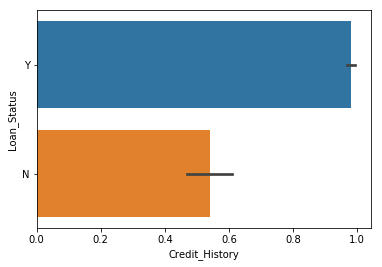

In [21]:
sns.barplot(data['Credit_History'],data['Loan_Status'])

the Credit_History whose range grater than 0.5 are most probably has higher chance of getting loan.

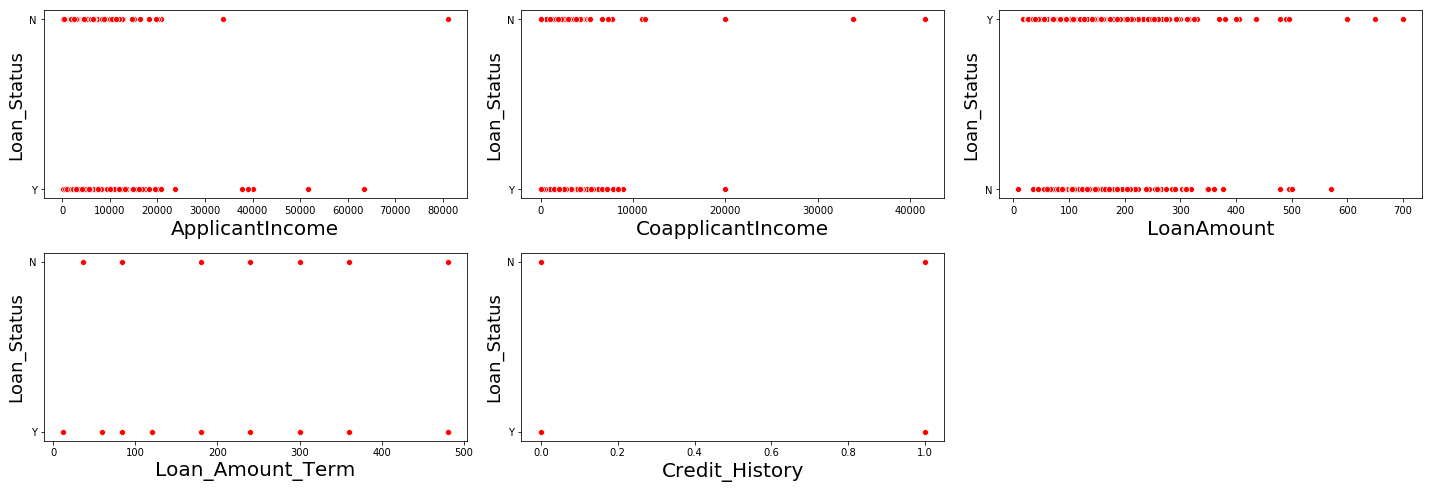

In [22]:
plt.figure(figsize=(20,40))
graph=1
for col in data.iloc[:,6:11]:
    if graph<13:
        ax=plt.subplot(12,3,graph)
        sns.scatterplot(data[col],data['Loan_Status'],color='Red')
        plt.xlabel(col,fontsize=20)
        plt.ylabel("Loan_Status",fontsize=18)
    graph+=1
plt.tight_layout()

ApplicantIncome are normally distributed in range of 0-20000.

CoapplicantIncome are normally distributed in range 0-10000.

LoanAmount are normally distributed in range of 0-400.

In [23]:
data['Gender']=data['Gender'].fillna(data.Gender.mode()[0])
data['Married']=data['Married'].fillna(data.Married.mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data.LoanAmount.mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data.Loan_Amount_Term.mean())
data['Credit_History']=data['Credit_History'].fillna(data.Credit_History.mode()[0])
data['Dependents']=data['Dependents'].fillna(data.Dependents.mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data.Self_Employed.mode()[0])

In [24]:
encoder=LabelEncoder()
data['Loan_ID']=encoder.fit_transform(data.Loan_ID)
data['Gender']=encoder.fit_transform(data.Gender)
data['Married']=encoder.fit_transform(data.Married)
data['Education']=encoder.fit_transform(data.Education)


In [25]:
data['Dependents']=encoder.fit_transform(data.Dependents)
data['Self_Employed']=encoder.fit_transform(data.Self_Employed)

In [26]:
data['Property_Area']=encoder.fit_transform(data.Property_Area)

In [27]:
data['Loan_Status']=data['Loan_Status'].replace({"Y":1,"N":0})

In [28]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

here we raplaced nullvalues by their respective mean or by mode.

Using encoder technique the data type also changed. now all columns are in int or float type only.

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


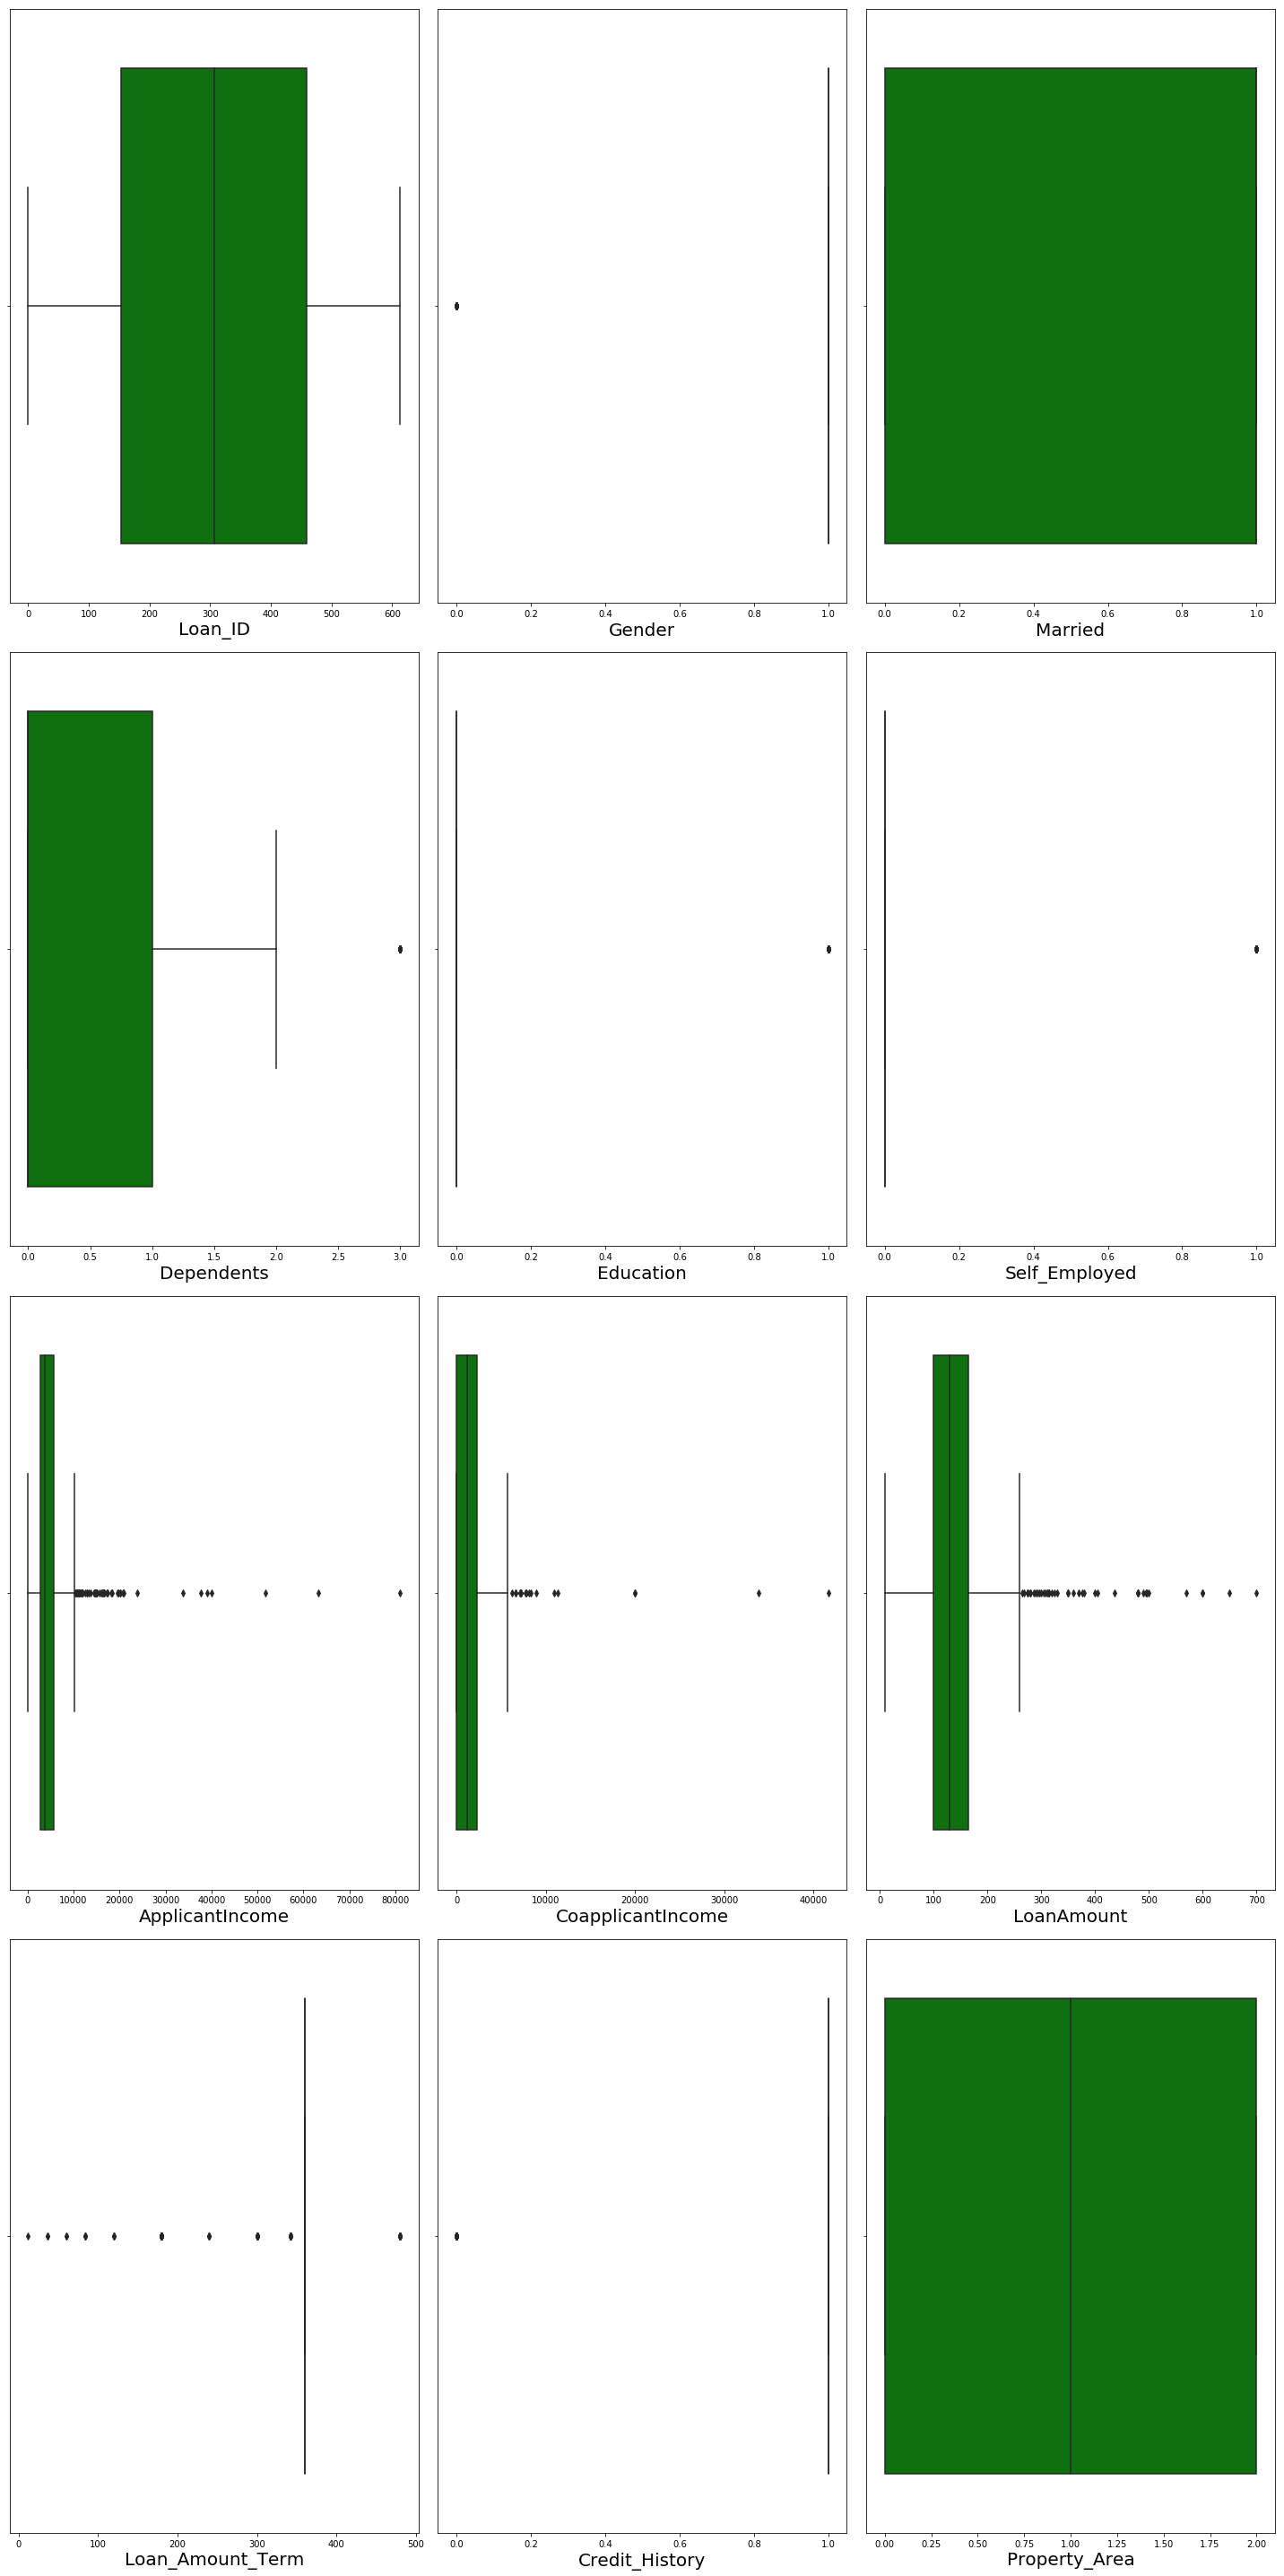

In [31]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(['Loan_Status'],axis=1):
    if graph<13:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data[col],color='Green')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

from boxplot graph there seems to be outliers in gender,dependents,Eductaion,self_employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

In [32]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


from description of each columns i analyse that the column that are gender, dependent,Education,Self_employed, are not balanced with their records.

and the columns for applicantIncome has max income 810000 and 41667 respectively why they need such loans.the loan_amount_term should not be greater than 30 years as it has max values of 40 yars i.e. 480 months.Removing such records seems to me as outliers. 

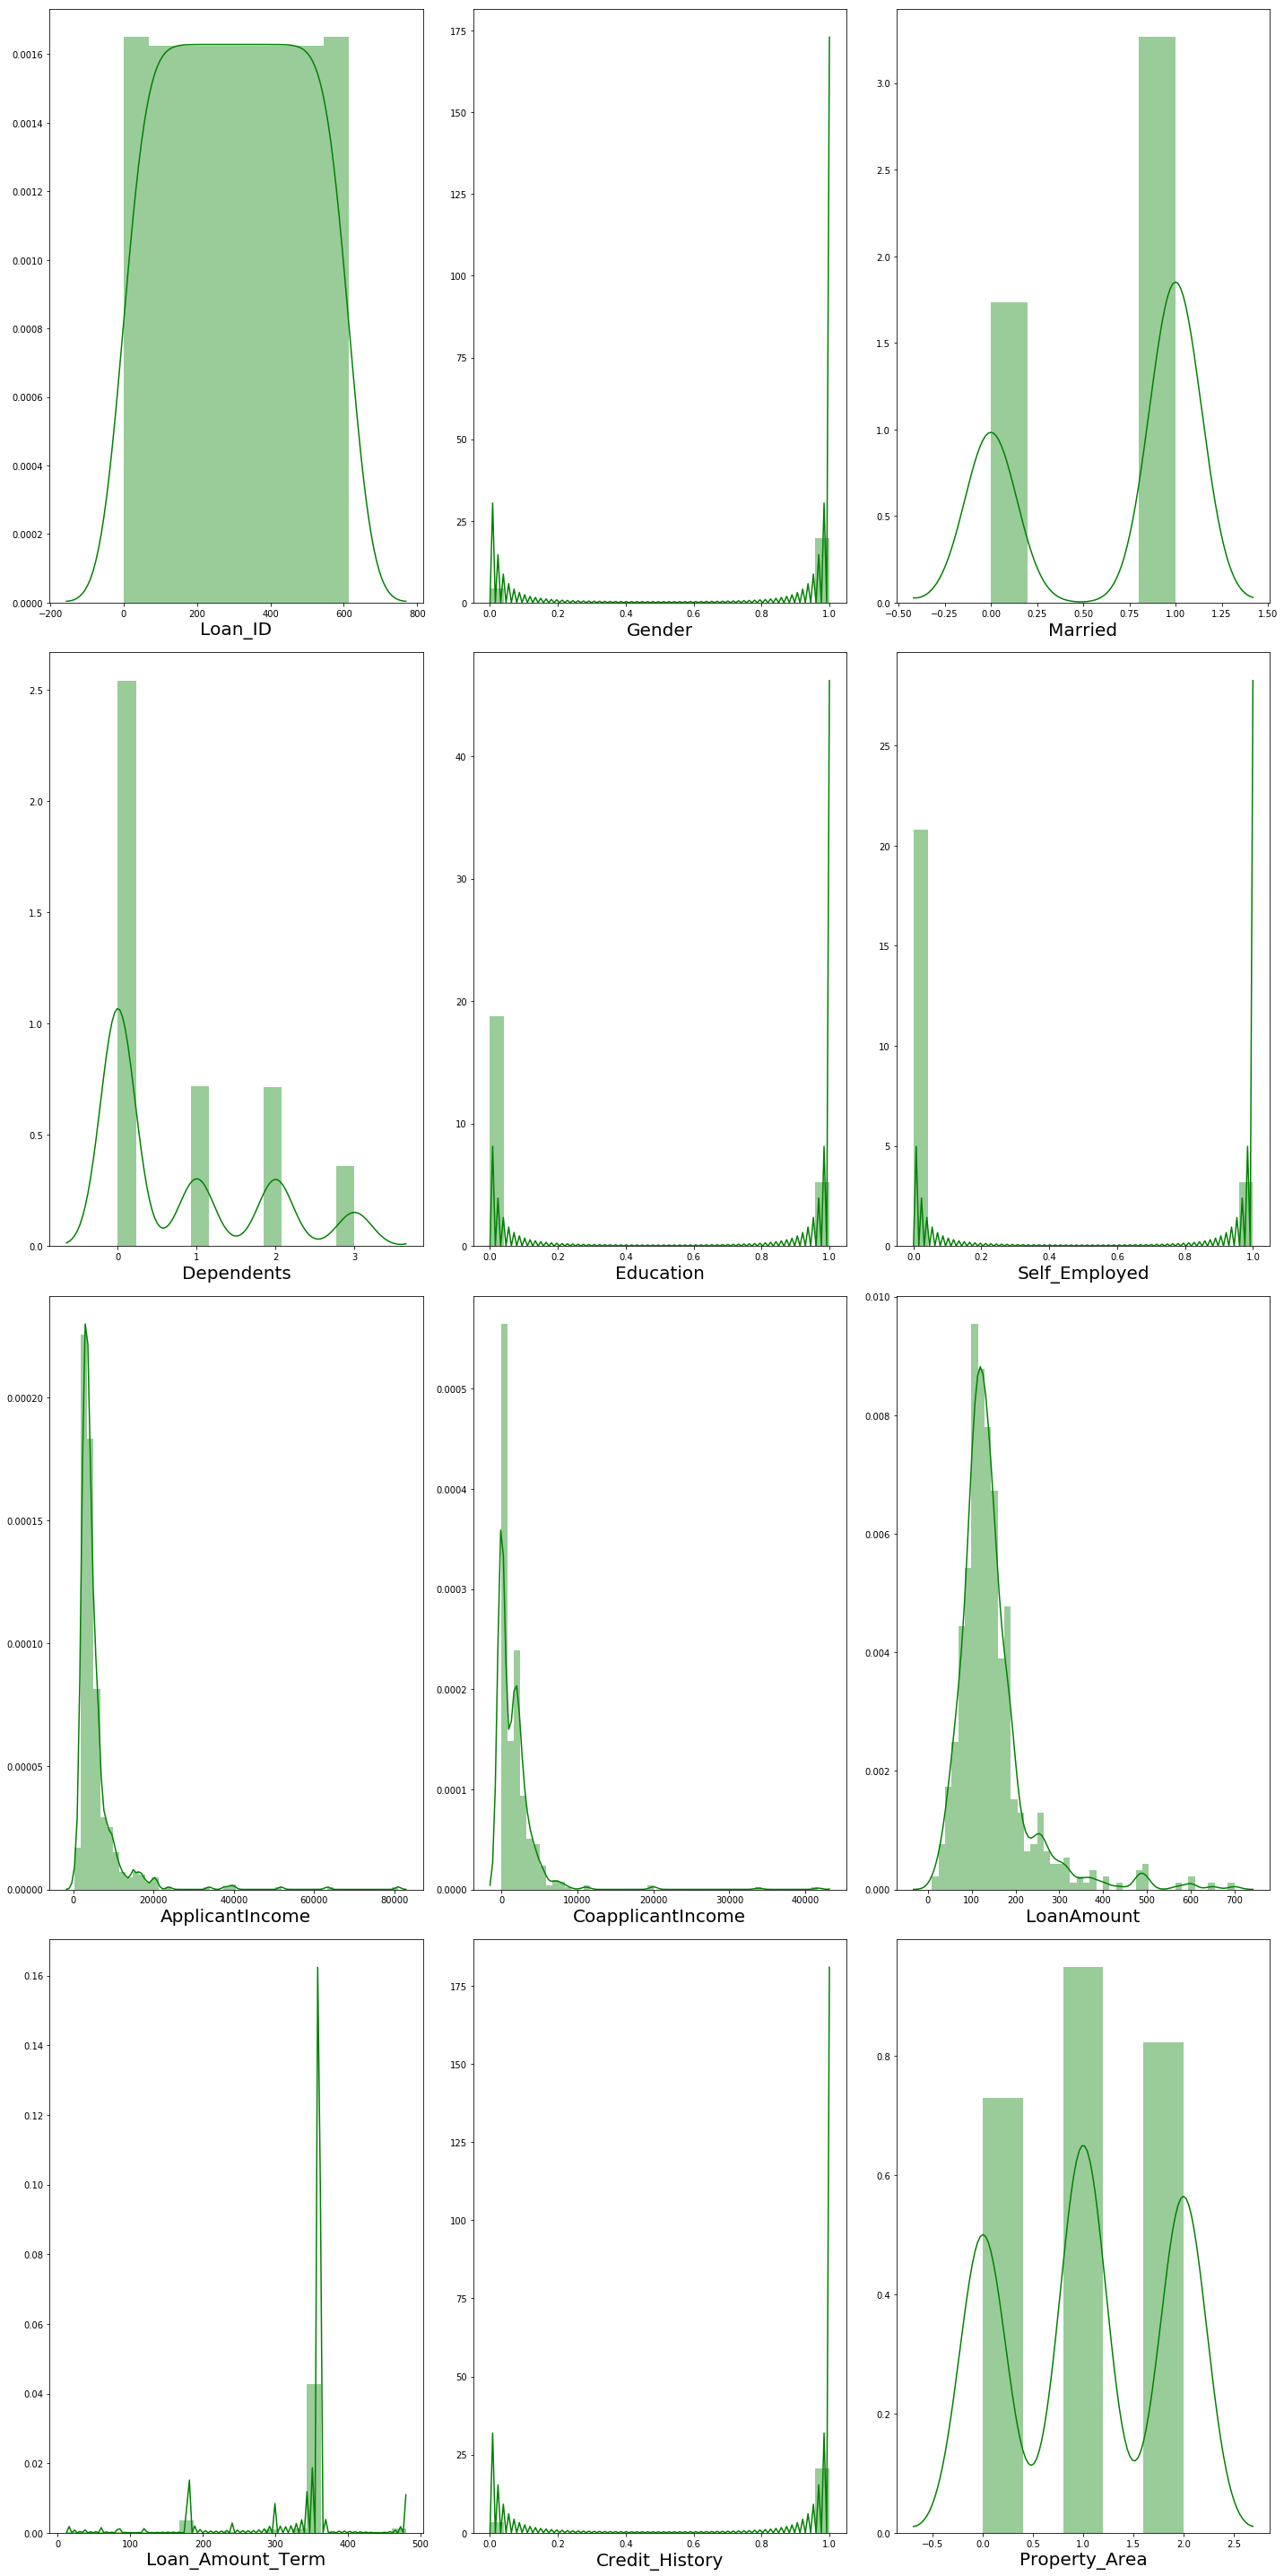

In [33]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(['Loan_Status'],axis=1):
    if graph<13:
        ax=plt.subplot(4,3,graph)
        sns.distplot(data[col],color='Green')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

Gender,Dependents,Education,Self_Employed ApplicantIncome  CoapplicantIncome Loan_Amount_Term  Credit_History are the columns that are not   normally distributed.              

In [34]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

columns that are not in range of 0.5 to -0.5 are the skewed.

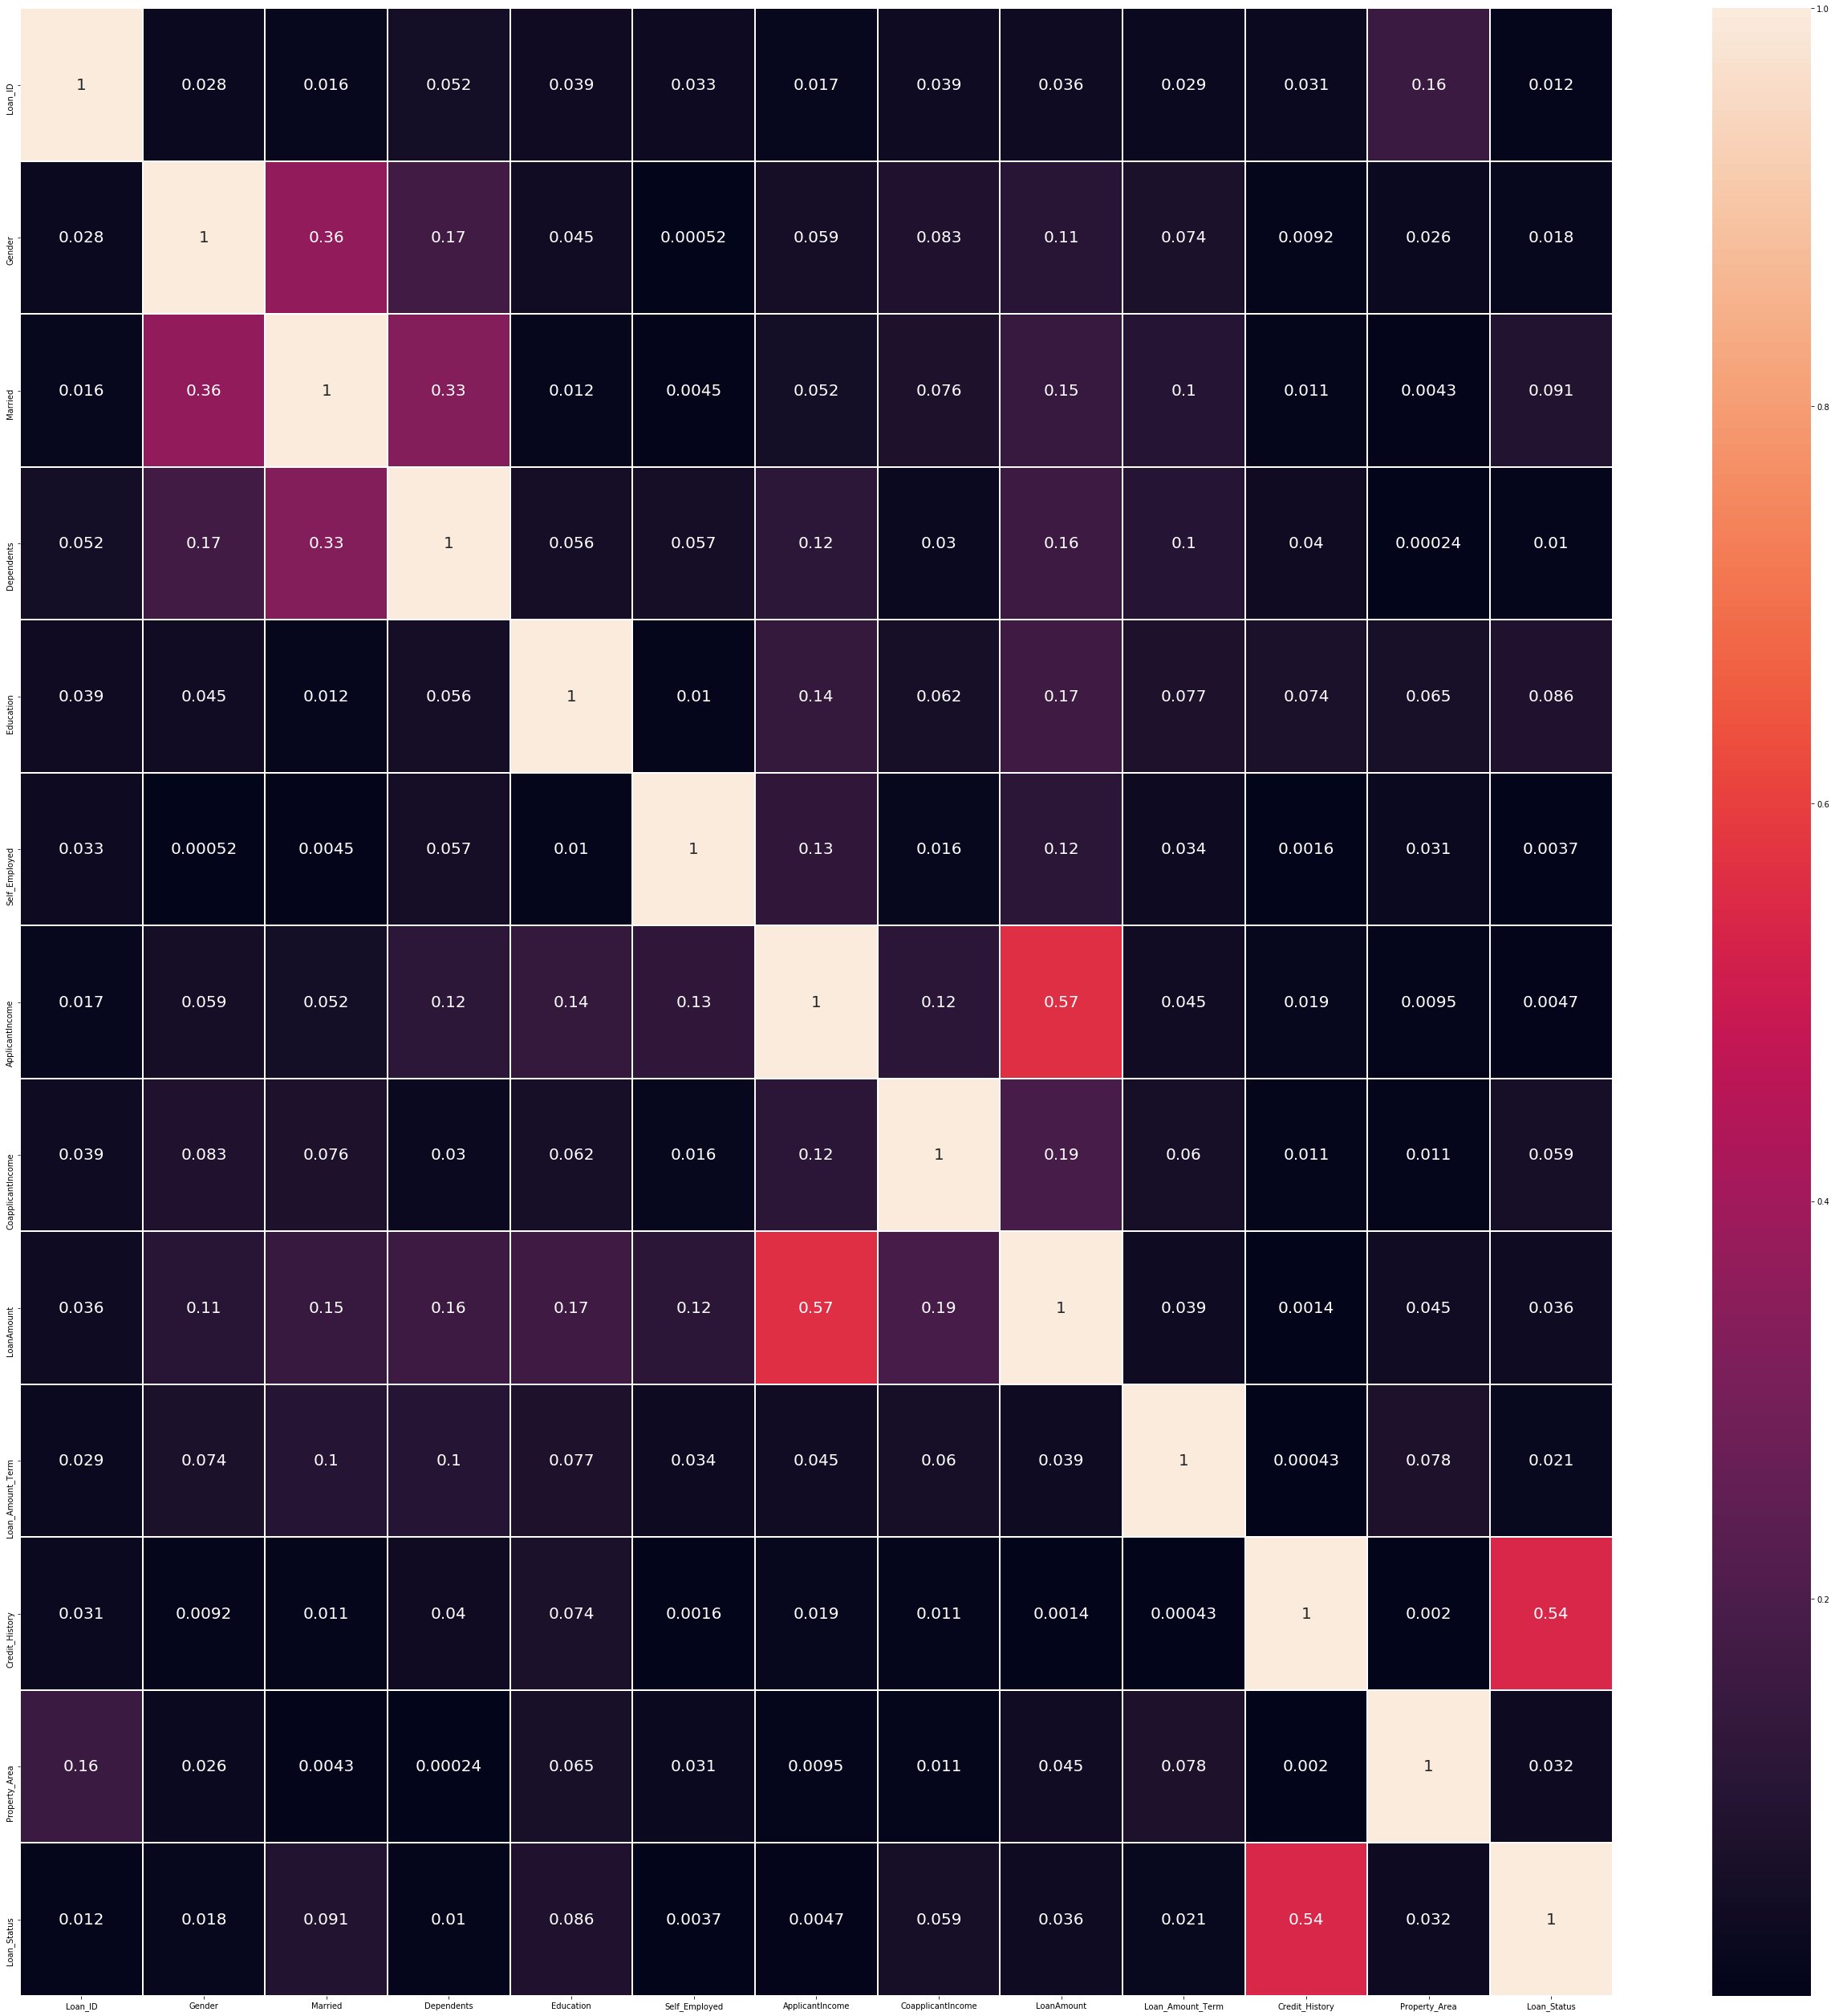

In [35]:
plt.figure(figsize=(35,35))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":20},linewidths=True)
plt.tight_layout()

NO-multiCollineairty exists.

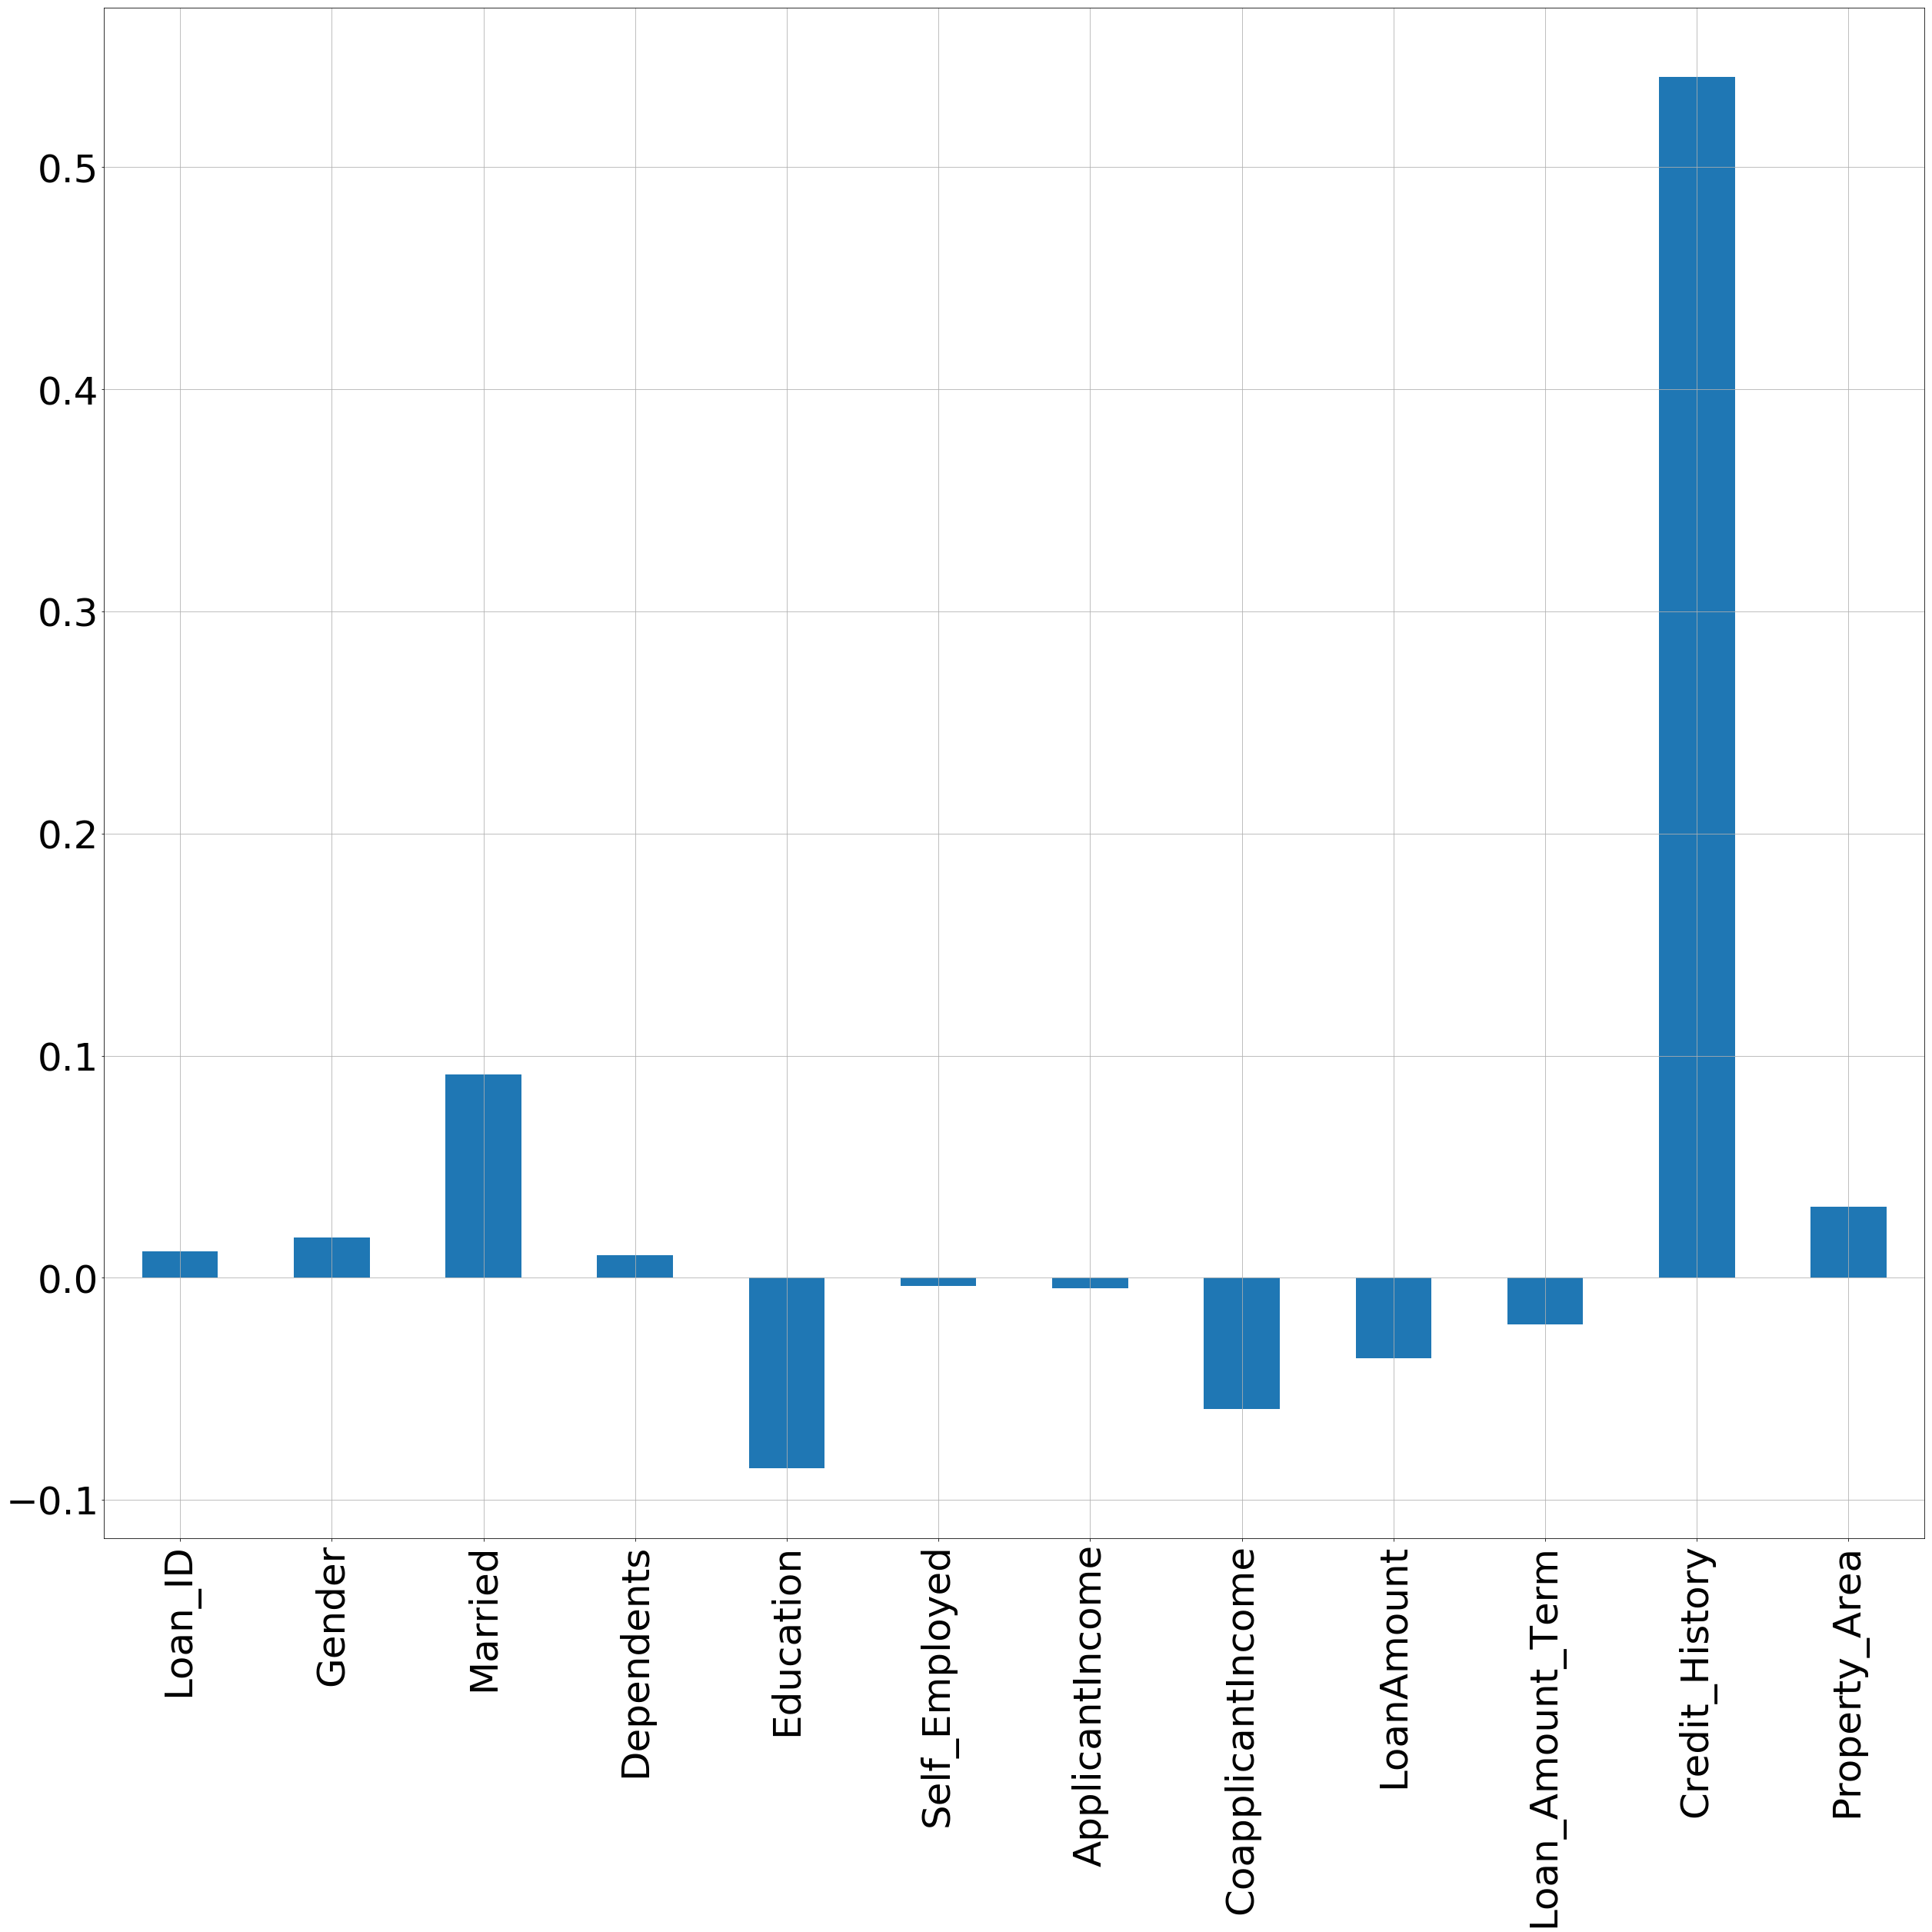

In [36]:
plt.figure(figsize=(35,35))
data.drop(['Loan_Status'],axis=1).corrwith(data.Loan_Status).plot(kind='bar',grid=True,fontsize=50)
plt.tight_layout()

self_employed,ApplicantIncome are the columns thats has negligible amount of contribution for predicting the loan_Status

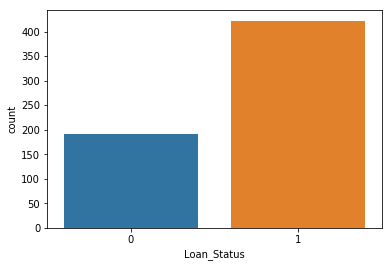

In [37]:
sns.countplot(data.Loan_Status)

imbalacing in our dataset.

In [38]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Loan_Status~Loan_ID+Gender+Married+Dependents+Education+Self_Employed+ApplicantIncome+CoapplicantIncome+LoanAmount+Loan_Amount_Term+Credit_History+Property_Area',data=data).fit()

lm.rsquared_adj

0.29856055559181616

In [40]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Loan_Status~Gender+Married+Dependents+Education+ApplicantIncome+CoapplicantIncome+LoanAmount+Credit_History+Property_Area',data=data).fit()

lm.rsquared_adj

0.30026186803544164

after keping columns as features only Married,CoapplicantIncome+Credit_History,Education,Depedents we have slightly moe increase in rsquared value.

In [41]:
data.shape

(614, 13)

### Data Cleaning

In [42]:
data.drop_duplicates(inplace=True)

In [43]:
data.shape

(614, 13)

No duplicates records

### Removing Outliers

In [45]:
features=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
zscore=zscore(data[features])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<3).all(axis=1)
data=data[filtered]

In [46]:
data.shape

(588, 13)

### Using PowerTransformer for Normal Distribution

In [47]:
features=['Gender','Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,0.47703,-1.366855,-0.810797,-0.535399,0.610278,-1.110668,0.270311,0.413902,1.196290
1,0.47703,0.731606,0.901776,-0.535399,0.190856,0.754935,-0.021460,0.413902,-1.337672
2,0.47703,0.731606,-0.810797,-0.535399,-0.536348,-1.110668,-1.413948,0.413902,1.196290
3,0.47703,0.731606,-0.810797,1.867766,-0.792749,0.902223,-0.160470,0.413902,1.196290
4,0.47703,-1.366855,-0.810797,-0.535399,0.654141,-1.110668,0.188226,0.413902,1.196290


In [48]:
features=data.drop(columns=["Loan_ID",'Self_Employed',"Loan_Amount_Term","Loan_Status"])
target=data.Loan_Status

Split fetaures and label dataset.

In [49]:
features.skew()

Gender              -1.623420
Married             -0.636874
Dependents           0.474933
Education            1.335777
ApplicantIncome      0.003081
CoapplicantIncome   -0.172184
LoanAmount           0.025739
Credit_History      -2.007254
Property_Area       -0.153740
dtype: float64

here we can see the data has now less skewd valued with respect to previous.

In [50]:
target.value_counts()

1    406
0    182
Name: Loan_Status, dtype: int64

In [51]:
features.shape

(588, 9)

In [54]:
## Data loss
print(f"Data Loss is:{((614-588)/614)*100}")

Data Loss is:4.234527687296417


4.23% data lost.

### Using Standard Scalar to normalize the dataset.

In [55]:
scalar=StandardScaler()

X_=scalar.fit_transform(features)

X_

array([[ 0.47702978, -1.36685503, -0.81079667, ...,  0.27031059,
         0.41390185,  1.19628956],
       [ 0.47702978,  0.73160648,  0.90177593, ..., -0.02145991,
         0.41390185, -1.33767245],
       [ 0.47702978,  0.73160648, -0.81079667, ..., -1.41394799,
         0.41390185,  1.19628956],
       ...,
       [ 0.47702978,  0.73160648,  0.90177593, ...,  1.48977996,
         0.41390185,  1.19628956],
       [ 0.47702978,  0.73160648,  1.34511545, ...,  0.80947551,
         0.41390185,  1.19628956],
       [-2.09630518, -1.36685503, -0.81079667, ...,  0.06141376,
        -2.41603173,  0.0199325 ]])

### Balancing Dataset

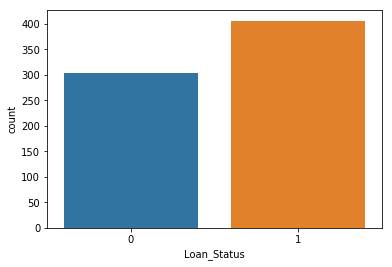

In [56]:
over_sampling=SMOTE(0.75)
X,Y=over_sampling.fit_resample(X_,target)

sns.countplot(Y)

In [57]:
Y.value_counts()

1    406
0    304
Name: Loan_Status, dtype: int64

now our target variable is balanced.

In [58]:
X.shape

(710, 9)

No. of records are incresed.

### Model Deployment

In [65]:
Linear=LogisticRegression()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()
svmm=SVC()

In [71]:
algo=[Linear,RandomForest,AdaBoost,Bagging,svmm]

In [72]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(1,150):
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

LogisticRegression():
---------------------------
---------------------------

The highest accuracy is 83.09859154929578 of model LogisticRegression() at random state 19


Confusion Matrix:

 [[27 36]
 [ 0 79]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        63
           1       0.69      1.00      0.81        79

    accuracy                           0.75       142
   macro avg       0.84      0.71      0.71       142
weighted avg       0.83      0.75      0.72       142

RandomForestClassifier():
---------------------------
---------------------------

The highest accuracy is 90.84507042253522 of model RandomForestClassifier() at random state 64


Confusion Matrix:

 [[43 20]
 [ 3 76]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.93      0.68      0.79        63
           1       0.79      0.96      0.87       

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [73]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(11,20):
        cvS=cross_val_score(model,X,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7422421328671329 at k-fold::11

Mean CV Score of model LogisticRegression():: 0.7436676082862523 at k-fold::12

Mean CV Score of model LogisticRegression():: 0.7450401450401449 at k-fold::13

Mean CV Score of model LogisticRegression():: 0.7450980392156863 at k-fold::14

Mean CV Score of model LogisticRegression():: 0.7437943262411346 at k-fold::15

Mean CV Score of model LogisticRegression():: 0.7465909090909091 at k-fold::16

Mean CV Score of model LogisticRegression():: 0.7437657990025279 at k-fold::17

Mean CV Score of model LogisticRegression():: 0.7436965811965813 at k-fold::18

Mean CV Score of model LogisticRegression():: 0.7438047465748298 at k-fold::19


RandomForestClassifier()
-------------------------


Mean CV Score of model RandomForestClassifier():: 0.803277972027972 at k-fold::11

Mean CV Score of model RandomForestClassifier():: 0.814171374764595 at k-fold::12

Mean CV Sc

In [74]:
CVmodel

{'LogisticRegression()': [0.7465909090909091],
 'RandomForestClassifier()': [0.8232387512165905],
 'AdaBoostClassifier()': [0.7582151300236405],
 'BaggingClassifier()': [0.797841087654574],
 'SVC()': [0.7550140056022407]}

here we can see the maximun CV score of each model

In [75]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LogisticRegression()::8.44
RandomForestClassifier()::8.52
AdaBoostClassifier()::8.69
BaggingClassifier()::6.84
SVC()::6.89


here for model BaggingClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 6.84.

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=8)

here we split the dataset in training and testing dataset at RandomState 8.

### Plotting ROC Curve

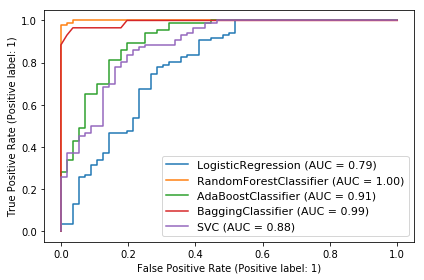

In [77]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(Bagging,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(svmm,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

## Hyperparameter Tuning

In [109]:
clf=BaggingClassifier()
RandomForest=RandomForestClassifier()
knn=KNeighborsClassifier
param={
    "base_estimator":[RandomForest,knn],
    "n_estimators":[17,19],
    "max_samples":[1.0,1.1],
    "bootstrap":[True,False],
    "oob_score":[False,True]
}
grd=GridSearchCV(clf,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

clf=grd.best_estimator_   #reinstantiating the beast parameter to algo

clf.fit(X_train,Y_train)
ypred=clf.predict(X_test)

print("Confusion Matrix::\n",confusion_matrix(Y_test,ypred))

print("Accuracy::",accuracy_score(Y_test,ypred))

print("Classification Report::\n",classification_report(Y_test,ypred))

Best Pramaeters: {'base_estimator': RandomForestClassifier(), 'bootstrap': False, 'max_samples': 1.0, 'n_estimators': 19, 'oob_score': False}
Confusion Matrix::
 [[44 12]
 [ 4 82]]
Accuracy:: 0.8873239436619719
Classification Report::
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        56
           1       0.87      0.95      0.91        86

    accuracy                           0.89       142
   macro avg       0.89      0.87      0.88       142
weighted avg       0.89      0.89      0.89       142



In [110]:
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))




Predicted values:
 [1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1]


The dataframe for the actual & predicted values:

      Actual data  Predicted
398            1          1
590            0          1
308            1          0
421            1          1
465            1          0
18             0          1
175            0          0
516            1          1
352            0          0
30             0          1
428            0          1
436            1          1
41             1          1
656            0          1
89             1          1
56             1          1
196            1          1
594            0          1
108            0          1
562            1          0
109            1          1
126            1     

## Saving Model

In [112]:
import pickle
pickle.dump(clf,open("Loan_approval.pickle","wb"))